In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load cleaned dataset
df = pd.read_csv("student_mat_cleaned.csv")

# Load selected features
selected_features = pd.read_csv("final_selected_features.csv")["Selected_Features"].tolist()

# Create X using selected features
X = df[selected_features]

# Target variable
y = df["G3"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)

# Model 2: LASSO regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("\nLASSO Regression Results:")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)

# Model 3: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)

Linear Regression Results:
MAE: 1.3190260699265006
MSE: 4.726809227705782
R2 Score: 0.7694806958544699

LASSO Regression Results:
MAE: 1.2426129315684298
MSE: 4.45571514717087
R2 Score: 0.7827015422632029

Ridge Regression Results:
MAE: 1.3190319770586034
MSE: 4.725537156028177
R2 Score: 0.7695427328574075


In [ ]:
# Create X using selected features
X = df[selected_features]

# Target variable
y = df["G3"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#model1 linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2 Score:", lr_r2)


Linear Regression Results:
MAE: 1.319026069926501
MSE: 4.7268092277057825
R2 Score: 0.7694806958544698


In [ ]:
#model2 LASSO regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("LASSO Regression Results:")
print("MAE:", lasso_mae)
print("MSE:", lasso_mse)
print("R2 Score:", lasso_r2)



LASSO Regression Results:
MAE: 1.2426129315684298
MSE: 4.45571514717087
R2 Score: 0.7827015422632029
Coefficients: [-0.         -0.06503513  0.         -0.          0.          0.47121083
 -0.          0.         -0.         -0.13406989 -0.22075691  0.
  3.57551072]
Intercept: 10.325949367088608


In [ ]:
#Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Results:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("R2 Score:", ridge_r2)


Ridge Regression Results:
MAE: 1.3190319770586034
MSE: 4.725537156028177
R2 Score: 0.7695427328574075


In [ ]:
#comparison of all models
results = pd.DataFrame({
    "Model": ["Linear Regression", "LASSO", "Ridge"],
    "MAE": [lr_mae, lasso_mae, ridge_mae],
    "MSE": [lr_mse, lasso_mse, ridge_mse],
    "R2 Score": [lr_r2, lasso_r2, ridge_r2]
})

results


,Model,MAE,MSE,R2 Score
0,Linear Regression,1.319026,4.726809,0.769481
1,LASSO,1.242613,4.455715,0.782702
2,Ridge,1.319032,4.725537,0.769543


In [ ]:
results.to_csv("model_comparison_results.csv", index=False)


In [ ]:
import joblib

# Save the trained LASSO model
joblib.dump(lasso, "trained_lasso_model.pkl")



['trained_lasso_model.pkl']


STARTING SHAP INTERPRETATION ANALYSIS


Performing SHAP Analysis on all models...

SHAP Analysis for Linear Regression


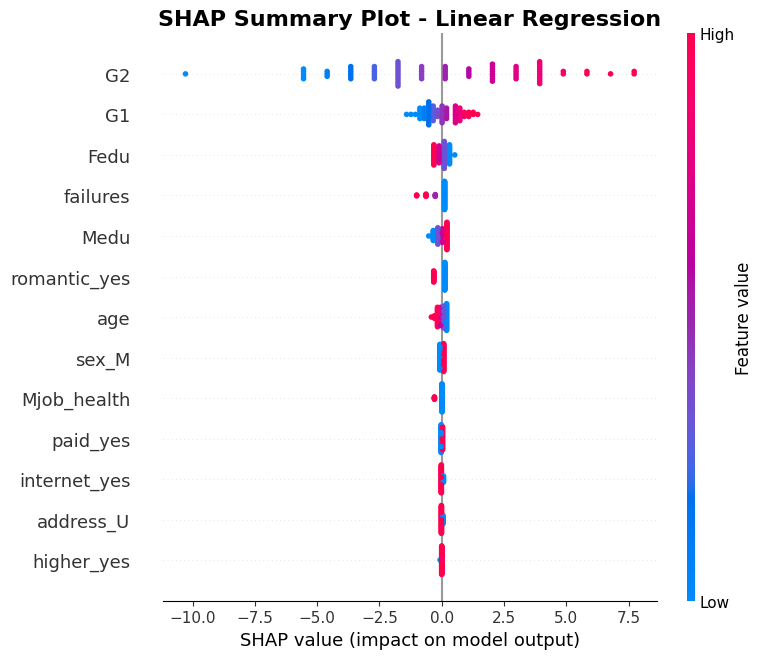

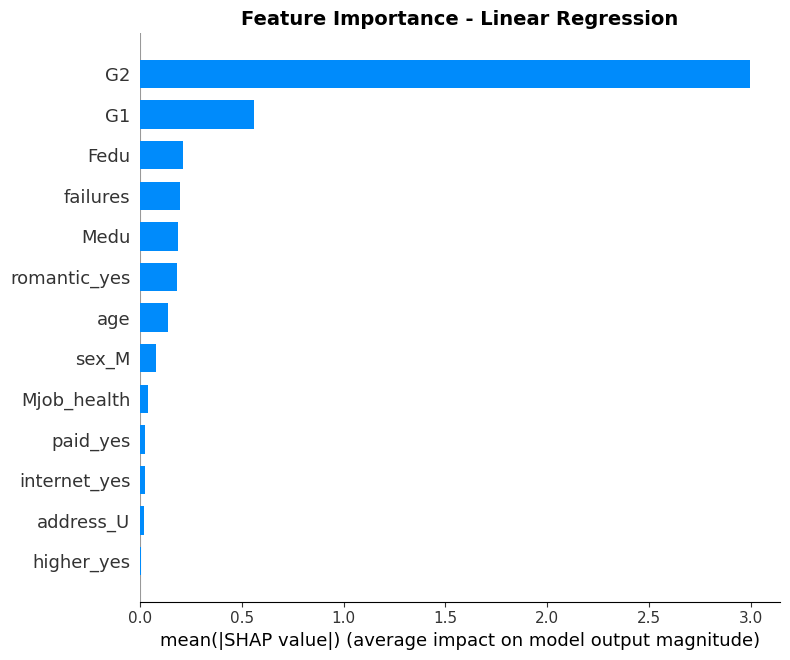


Top 5 Most Important Features for Linear Regression:
  13. G2: 2.9934 (Positive impact)
  6. G1: 0.5578 (Negative impact)
  1. Fedu: 0.2084 (Positive impact)
  11. failures: 0.1976 (Negative impact)
  12. Medu: 0.1837 (Negative impact)

SHAP Analysis for LASSO Regression


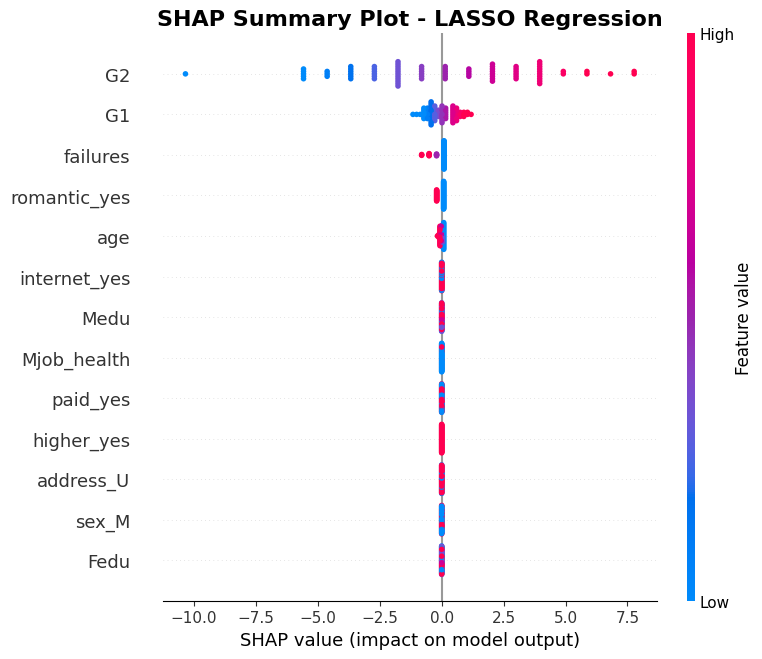

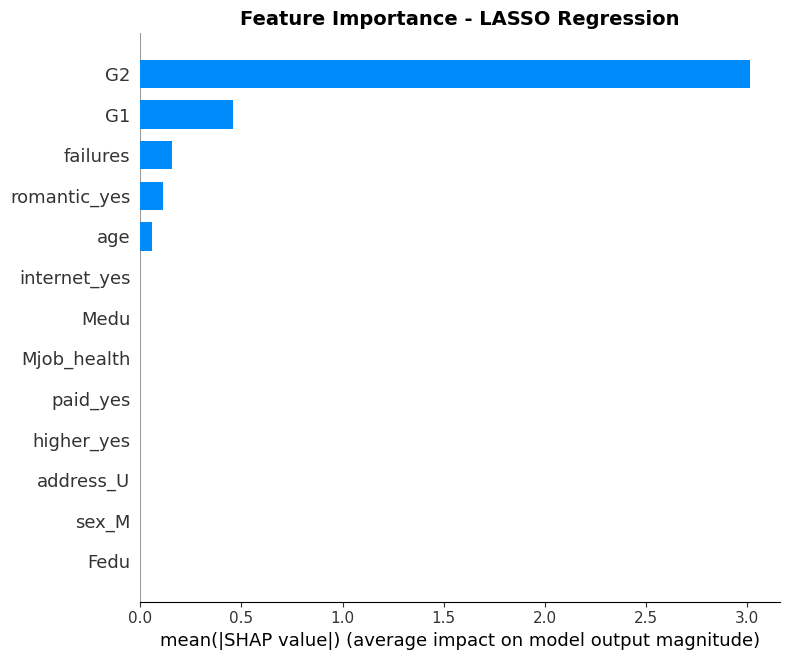


Top 5 Most Important Features for LASSO Regression:
  13. G2: 3.0107 (Positive impact)
  6. G1: 0.4589 (Negative impact)
  11. failures: 0.1591 (Negative impact)
  10. romantic_yes: 0.1151 (Negative impact)
  2. age: 0.0578 (Positive impact)

SHAP Analysis for Ridge Regression


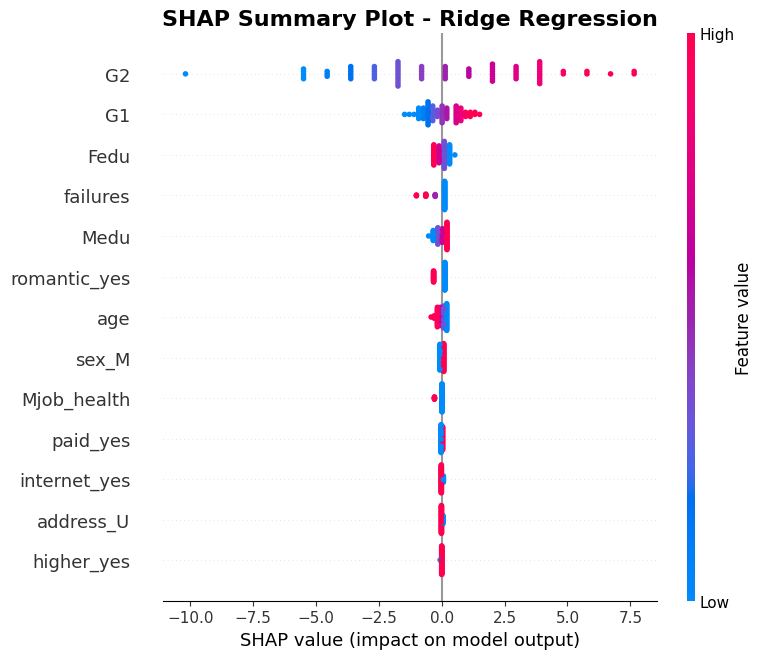

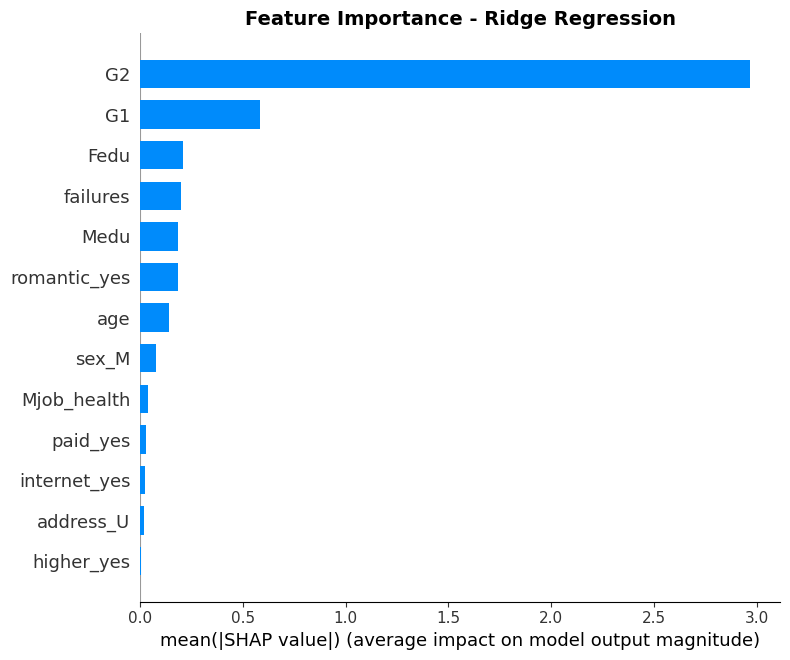


Top 5 Most Important Features for Ridge Regression:
  13. G2: 2.9647 (Positive impact)
  6. G1: 0.5830 (Negative impact)
  1. Fedu: 0.2080 (Positive impact)
  11. failures: 0.1979 (Negative impact)
  12. Medu: 0.1828 (Negative impact)

COMPARATIVE FEATURE IMPORTANCE ACROSS MODELS

Top 10 Features by Average Importance:
--------------------------------------------------
Model         Linear   LASSO   Ridge  Average_Importance
Feature                                                 
G2            2.9934  3.0107  2.9647              2.9896
G1            0.5578  0.4589  0.5830              0.5332
failures      0.1976  0.1591  0.1979              0.1849
romantic_yes  0.1807  0.1151  0.1824              0.1594
Fedu          0.2084  0.0000  0.2080              0.1388
Medu          0.1837  0.0000  0.1828              0.1222
age           0.1387  0.0578  0.1403              0.1123
sex_M         0.0767  0.0000  0.0772              0.0513
Mjob_health   0.0369  0.0000  0.0364              0.0244


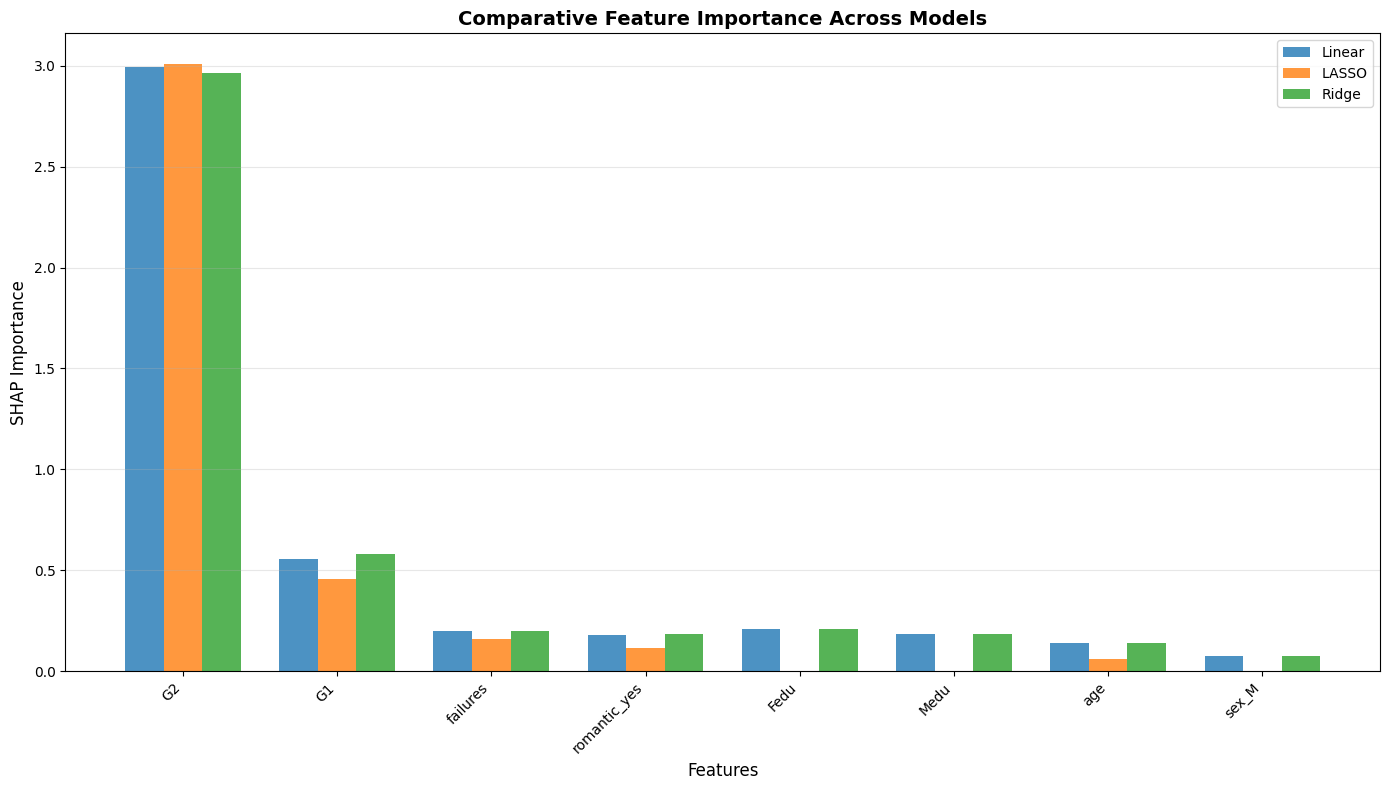


Feature importance comparison saved to 'feature_importance_comparison.csv'

INDIVIDUAL PREDICTION EXPLANATIONS (LASSO MODEL)

INDIVIDUAL PREDICTION EXPLANATION - Sample 0
Top features affecting this prediction:
------------------------------------------------------------
  G2: 8.00 (decreases prediction by 2.72)
  failures: 3.00 (decreases prediction by 0.81)
  G1: 8.00 (decreases prediction by 0.43)
  romantic_yes: 0.00 (increases prediction by 0.08)
  age: 17.00 (decreases prediction by 0.02)


<Figure size 1200x300 with 0 Axes>

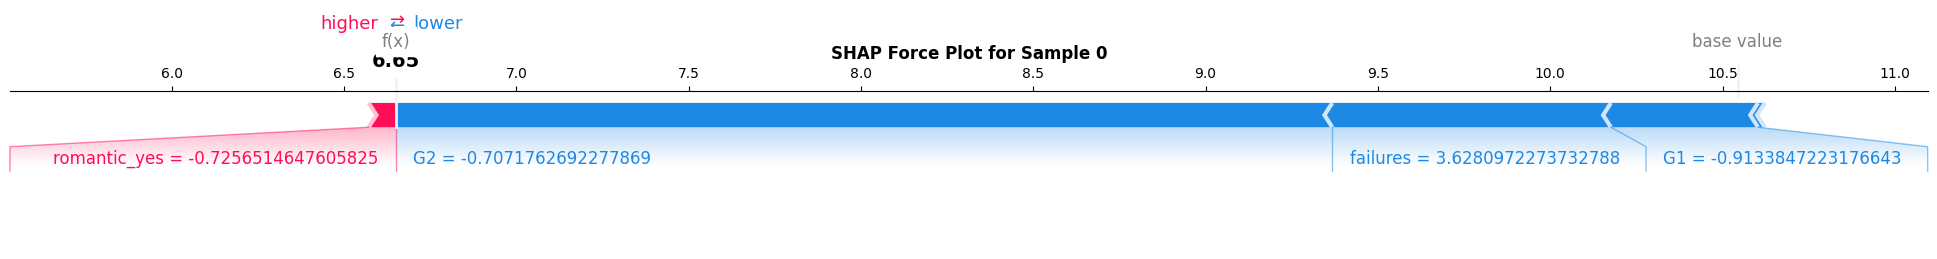


Actual G3 Grade: 10.00
Predicted G3 Grade: 6.65
Prediction Error: 3.35

INDIVIDUAL PREDICTION EXPLANATION - Sample 1
Top features affecting this prediction:
------------------------------------------------------------
  G2: 12.00 (increases prediction by 1.10)
  G1: 14.00 (increases prediction by 0.45)
  romantic_yes: 1.00 (decreases prediction by 0.20)
  failures: 0.00 (increases prediction by 0.09)
  age: 18.00 (decreases prediction by 0.07)


<Figure size 1200x300 with 0 Axes>

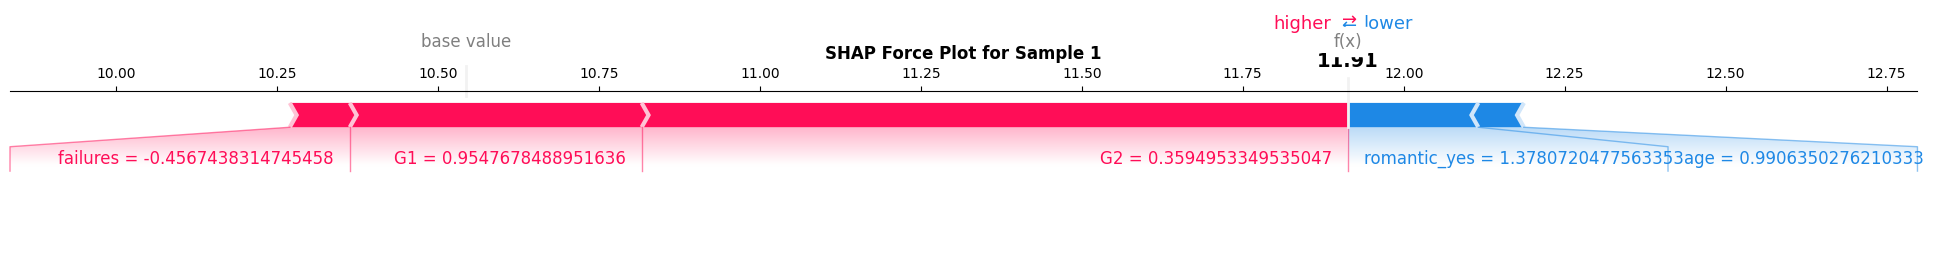


Actual G3 Grade: 12.00
Predicted G3 Grade: 11.91
Prediction Error: 0.09

INDIVIDUAL PREDICTION EXPLANATION - Sample 2
Top features affecting this prediction:
------------------------------------------------------------
  G2: 5.00 (decreases prediction by 5.58)
  G1: 3.00 (decreases prediction by 1.16)
  failures: 1.00 (decreases prediction by 0.21)
  romantic_yes: 1.00 (decreases prediction by 0.20)
  age: 18.00 (decreases prediction by 0.07)


<Figure size 1200x300 with 0 Axes>

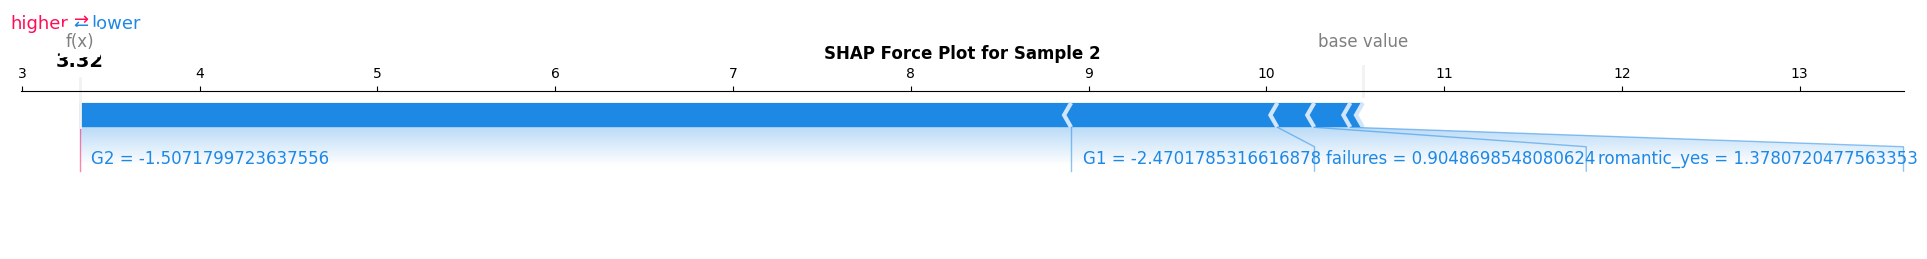


Actual G3 Grade: 5.00
Predicted G3 Grade: 3.32
Prediction Error: 1.68

SHAP explainer saved as 'shap_explainer_lasso.pkl'


In [14]:
import joblib
print("\n" + "="*70)
print("STARTING SHAP INTERPRETATION ANALYSIS")
print("="*70)

# Initialize JS for SHAP plots
shap.initjs()

def shap_analysis(model, X_train, X_test, feature_names, model_name):
    print(f"\n{'='*60}")
    print(f"SHAP Analysis for {model_name}")
    print(f"{'='*60}")

    try:
        # Create SHAP explainer
        explainer = shap.Explainer(model, X_train)

        # Calculate SHAP values for test set (using subset for speed)
        shap_values = explainer(X_test[:100])

        # 1. Summary Plot (Feature Importance)
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names, show=False)
        plt.title(f'SHAP Summary Plot - {model_name}', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'shap_summary_{model_name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 2. Bar Plot (Mean Absolute SHAP values)
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_test[:100], feature_names=feature_names, plot_type="bar", show=False)
        plt.title(f'Feature Importance - {model_name}', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'shap_bar_{model_name.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # 3. Print feature importance rankings
        shap_df = pd.DataFrame({
            'feature': feature_names,
            'importance': np.abs(shap_values.values).mean(0),
            'direction': np.where(shap_values.values.mean(0) > 0, 'Positive', 'Negative')
        }).sort_values('importance', ascending=False)

        print(f"\nTop 5 Most Important Features for {model_name}:")
        for i, row in shap_df.head().iterrows():
            print(f"  {i+1}. {row['feature']}: {row['importance']:.4f} ({row['direction']} impact)")

        return explainer, shap_values, shap_df

    except Exception as e:
        print(f"Error in SHAP analysis for {model_name}: {e}")
        return None, None, None

# Apply SHAP analysis to each model
print("Performing SHAP Analysis on all models...")

# For Linear Regression
explainer_lr, shap_values_lr, importance_lr = shap_analysis(
    lr, X_train_scaled, X_test_scaled, selected_features, "Linear Regression"
)

# For LASSO Regression
explainer_lasso, shap_values_lasso, importance_lasso = shap_analysis(
    lasso, X_train_scaled, X_test_scaled, selected_features, "LASSO Regression"
)

# For Ridge Regression
explainer_ridge, shap_values_ridge, importance_ridge = shap_analysis(
    ridge, X_train_scaled, X_test_scaled, selected_features, "Ridge Regression"
)

# Compare feature importance across models
def compare_feature_importance():
    print(f"\n{'='*60}")
    print("COMPARATIVE FEATURE IMPORTANCE ACROSS MODELS")
    print(f"{'='*60}")

    # Create comparison DataFrame
    comparison_data = []

    for importance_df, model_name in zip([importance_lr, importance_lasso, importance_ridge],
                                        ['Linear', 'LASSO', 'Ridge']):
        if importance_df is not None:
            for _, row in importance_df.iterrows():
                comparison_data.append({
                    'Feature': row['feature'],
                    'Importance': row['importance'],
                    'Model': model_name,
                    'Direction': row['direction']
                })

    comparison_df = pd.DataFrame(comparison_data)

    # Pivot for easier comparison
    pivot_df = comparison_df.pivot_table(
        index='Feature',
        columns='Model',
        values='Importance',
        aggfunc='first'
    ).fillna(0)

    # Calculate average importance
    pivot_df['Average_Importance'] = pivot_df.mean(axis=1)
    pivot_df = pivot_df.sort_values('Average_Importance', ascending=False)

    print("\nTop 10 Features by Average Importance:")
    print("-" * 50)
    print(pivot_df[['Linear', 'LASSO', 'Ridge', 'Average_Importance']].round(4).head(10))

    # Visualize top features
    top_features = pivot_df.head(8).index

    plt.figure(figsize=(14, 8))
    x = np.arange(len(top_features))
    width = 0.25

    if 'Linear' in pivot_df.columns:
        plt.bar(x - width, pivot_df.loc[top_features, 'Linear'], width, label='Linear', alpha=0.8)
    if 'LASSO' in pivot_df.columns:
        plt.bar(x, pivot_df.loc[top_features, 'LASSO'], width, label='LASSO', alpha=0.8)
    if 'Ridge' in pivot_df.columns:
        plt.bar(x + width, pivot_df.loc[top_features, 'Ridge'], width, label='Ridge', alpha=0.8)

    plt.xlabel('Features', fontsize=12)
    plt.ylabel('SHAP Importance', fontsize=12)
    plt.title('Comparative Feature Importance Across Models', fontsize=14, fontweight='bold')
    plt.xticks(x, top_features, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('comparative_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    return pivot_df

# Get comparative feature importance
feature_importance_comparison = compare_feature_importance()
feature_importance_comparison.to_csv("feature_importance_comparison.csv", index=True)
print("\nFeature importance comparison saved to 'feature_importance_comparison.csv'")

# Individual prediction explanations
def explain_individual_prediction(model, explainer, X_test, y_test, feature_names, scaler, index=0):
    """Explain an individual prediction"""
    print(f"\n{'='*50}")
    print(f"INDIVIDUAL PREDICTION EXPLANATION - Sample {index}")
    print(f"{'='*50}")

    try:
        # Get the specific instance
        instance = X_test[index:index+1]

        # Calculate SHAP values for this instance
        shap_values_instance = explainer(instance)

        # Get original feature values (unscaled)
        original_instance = scaler.inverse_transform(instance)[0]

        # Create a DataFrame for better visualization
        instance_df = pd.DataFrame({
            'Feature': feature_names,
            'Scaled_Value': instance[0],
            'Original_Value': original_instance,
            'SHAP_Value': shap_values_instance.values[0]
        }).sort_values('SHAP_Value', key=abs, ascending=False)

        print("Top features affecting this prediction:")
        print("-" * 60)
        for _, row in instance_df.head(5).iterrows():
            effect = "increases" if row['SHAP_Value'] > 0 else "decreases"
            print(f"  {row['Feature']}: {row['Original_Value']:.2f} ({effect} prediction by {abs(row['SHAP_Value']):.2f})")

        # Force plot
        plt.figure(figsize=(12, 3))
        shap.force_plot(explainer.expected_value, shap_values_instance.values[0],
                       instance[0], feature_names=feature_names, matplotlib=True, show=False)
        plt.title(f'SHAP Force Plot for Sample {index}', fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'shap_force_plot_sample_{index}.png', dpi=300, bbox_inches='tight')
        plt.show()

        # Print actual values and prediction
        actual_grade = y_test.iloc[index]
        predicted_grade = model.predict(instance)[0]
        print(f"\nActual G3 Grade: {actual_grade:.2f}")
        print(f"Predicted G3 Grade: {predicted_grade:.2f}")
        print(f"Prediction Error: {abs(actual_grade - predicted_grade):.2f}")

        return instance_df

    except Exception as e:
        print(f"Error in individual prediction explanation: {e}")
        return None

# Explain first few predictions for LASSO model
if explainer_lasso is not None:
    print("\n" + "="*60)
    print("INDIVIDUAL PREDICTION EXPLANATIONS (LASSO MODEL)")
    print("="*60)

    for i in range(3):  # Explain first 3 samples
        explain_individual_prediction(lasso, explainer_lasso, X_test_scaled, y_test, selected_features, scaler, index=i)

# Save SHAP explainers for future use
if explainer_lasso is not None:
    joblib.dump(explainer_lasso, "shap_explainer_lasso.pkl")
    print("\nSHAP explainer saved as 'shap_explainer_lasso.pkl'")